In [30]:
import k3d
import math
import numpy as np
from k3d.helpers import download

In [4]:
import nibabel as nib

filename = download('https://github.com/FNNDSC/data/raw/master/nifti/adi_brain/adi_brain.nii.gz')

nii_source = nib.load(filename)
img = nii_source.get_fdata()
dx, dy, dz = nii_source.header.get_zooms()
img = np.swapaxes(img,0,2).astype(np.float32)
nz, ny, nx = img.shape

volume = k3d.volume(img, color_range=[50,1000], color_map=np.array(k3d.basic_color_maps.Jet, dtype=np.float32))

plot = k3d.plot()
plot += volume
plot.display()

Downloading: adi_brain.nii.gz


Output()

In [5]:
import xrdc
from xrdc.datasets import d3d

Loading Data from: /Users/ollie/Documents/SLAC/xrd_clustering/notebooks/../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)


In [14]:
import matplotlib.pyplot as plt

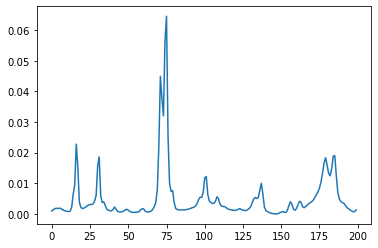

In [15]:
plt.plot(d3d.get_data().reshape(15, 15, 200, -1).sum(axis = 3)[5, 5, :])

In [62]:
patterns = m3d = d3d.get_data().reshape(15, 15, 200, -1).sum(axis = 3)

def heatmap3d(patterns):
    img = patterns
    dx, dy, dz = 1, 1, 1#nii_source.header.get_zooms()
    img = img.astype(np.float32) / img.max()#np.swapaxes(img,0,2).astype(np.float32)

    img = np.log(1 + 10 * img)
    nz, ny, nx = img.shape

    volume = k3d.volume(img, interpolation = True, bounds = np.array([0, 1, 0, .25, 0, .25]), color_range=[0.2,.9],
                        color_map=np.array(k3d.basic_color_maps.Jet, dtype=np.float32))

    plot = k3d.plot()
    plot += volume
    plot.display()
    return plot, volume

In [63]:
from ipywidgets import interactive


def iplot_rows(patterns, log = False, offset = 0, height = '550px'):
    """
    """
    plot, volume = heatmap3d(patterns)
    def f(i):
        volume.samples = 512 * 2
        plot.clipping_planes = [[-1, 0, 0, 1 - i]]

    interactive_plot = interactive(f, i=(0, 1, .005))
#     output = interactive_plot.children[-1]
#     output.layout.height = height
    return interactive_plot


In [64]:
iplot_rows(patterns)

Output()

interactive(children=(FloatSlider(value=0.0, description='i', max=1.0, step=0.005), Output()), _dom_classes=('…

In [28]:
from xrdc import source_separation as sep

In [32]:
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns, threshold = 50)

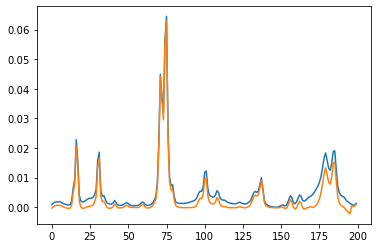

In [36]:
plt.plot(patterns[5, 5, :])
plt.plot(fast_q[5, 5, :])

In [66]:
pwd

'/Users/ollie/Documents/SLAC/xrd_clustering/notebooks'

In [65]:
iplot_rows(fast_q)

Output()

interactive(children=(FloatSlider(value=0.0, description='i', max=1.0, step=0.005), Output()), _dom_classes=('…